In [1]:
import jax
import jax.numpy as jnp
from jax import grad
jax.config.update('jax_platform_name', 'cpu')

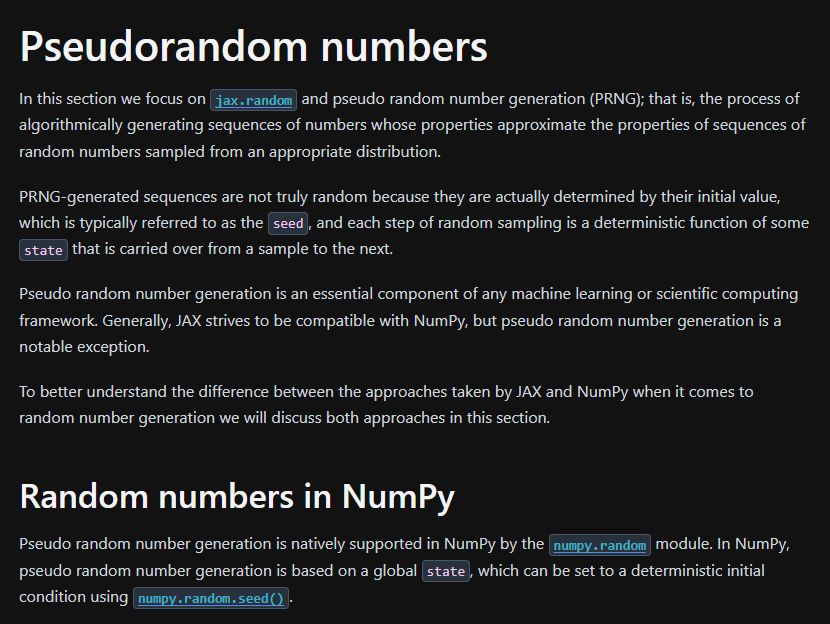

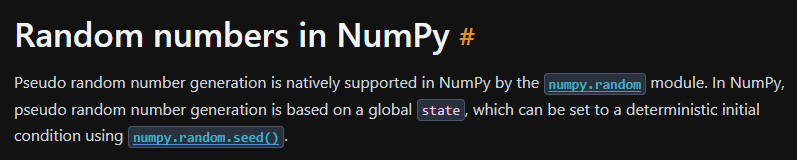

In [2]:
import numpy as np
np.random.seed(0)

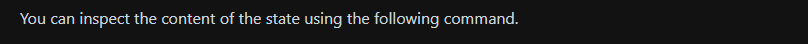

In [3]:
def print_truncated_random_state():
  """To avoid spamming the outputs, print only part of the state."""
  full_random_state = np.random.get_state()
  print(str(full_random_state)[:460], '...')

print_truncated_random_state()

('MT19937', array([         0,          1, 1812433255, 1900727105, 1208447044,
       2481403966, 4042607538,  337614300, 3232553940, 1018809052,
       3202401494, 1775180719, 3192392114,  594215549,  184016991,
        829906058,  610491522, 3879932251, 3139825610,  297902587,
       4075895579, 2943625357, 3530655617, 1423771745, 2135928312,
       2891506774, 1066338622,  135451537,  933040465, 2759011858,
       2273819758, 3545703099, 2516396728, 127 ...


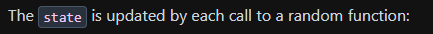

In [4]:
np.random.seed(0)
print_truncated_random_state()

('MT19937', array([         0,          1, 1812433255, 1900727105, 1208447044,
       2481403966, 4042607538,  337614300, 3232553940, 1018809052,
       3202401494, 1775180719, 3192392114,  594215549,  184016991,
        829906058,  610491522, 3879932251, 3139825610,  297902587,
       4075895579, 2943625357, 3530655617, 1423771745, 2135928312,
       2891506774, 1066338622,  135451537,  933040465, 2759011858,
       2273819758, 3545703099, 2516396728, 127 ...


In [5]:
_ = np.random.uniform()
print_truncated_random_state()

('MT19937', array([2443250962, 1093594115, 1878467924, 2709361018, 1101979660,
       3904844661,  676747479, 2085143622, 1056793272, 3812477442,
       2168787041,  275552121, 2696932952, 3432054210, 1657102335,
       3518946594,  962584079, 1051271004, 3806145045, 1414436097,
       2032348584, 1661738718, 1116708477, 2562755208, 3176189976,
        696824676, 2399811678, 3992505346,  569184356, 2626558620,
        136797809, 4273176064,  296167901, 343 ...


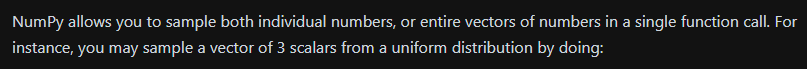

In [6]:
np.random.seed(0)
print(np.random.uniform(size=3))

[0.5488135  0.71518937 0.60276338]


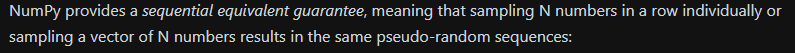

In [7]:
np.random.seed(0)
print("individually:", np.stack([np.random.uniform() for _ in range(3)]))

np.random.seed(0)
print("all at once: ", np.random.uniform(size=3))

individually: [0.5488135  0.71518937 0.60276338]
all at once:  [0.5488135  0.71518937 0.60276338]


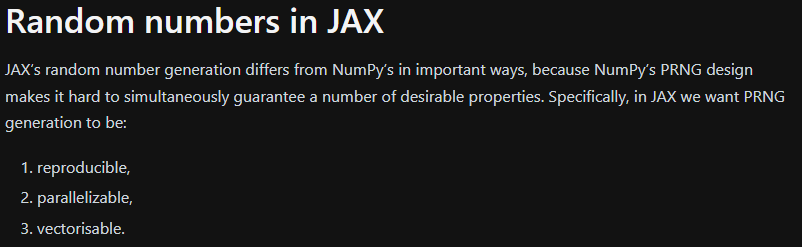

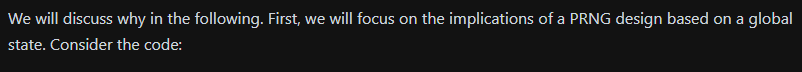

In [8]:
import numpy as np

np.random.seed(0)

def bar(): return np.random.uniform()
def baz(): return np.random.uniform()

def foo(): return bar() + 2 * baz()

print(foo())

1.9791922366721637


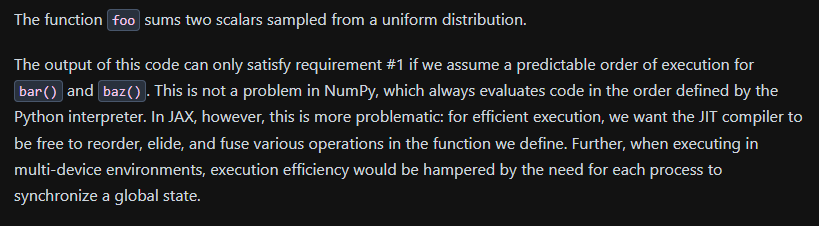

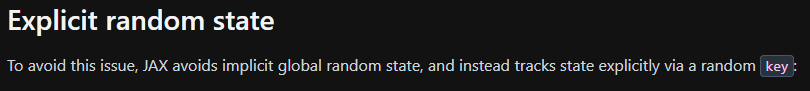

In [9]:
from jax import random

key = random.key(42)
print(key)

Array((), dtype=key<fry>) overlaying:
[ 0 42]


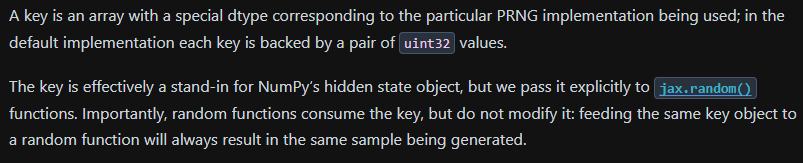

In [10]:
print(random.normal(key))
print(random.normal(key))

-0.18471177
-0.18471177


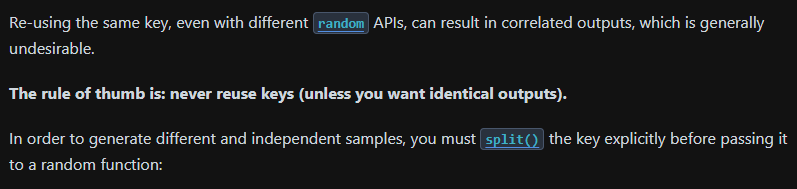

In [11]:
for i in range(3):
  new_key, subkey = random.split(key)
  del key  # The old key is consumed by split() -- we must never use it again.

  val = random.normal(subkey)
  del subkey  # The subkey is consumed by normal().

  print(f"draw {i}: {val}")
  key = new_key  # new_key is safe to use in the next iteration.

draw 0: 1.369469404220581
draw 1: -0.19947023689746857
draw 2: -2.298278331756592


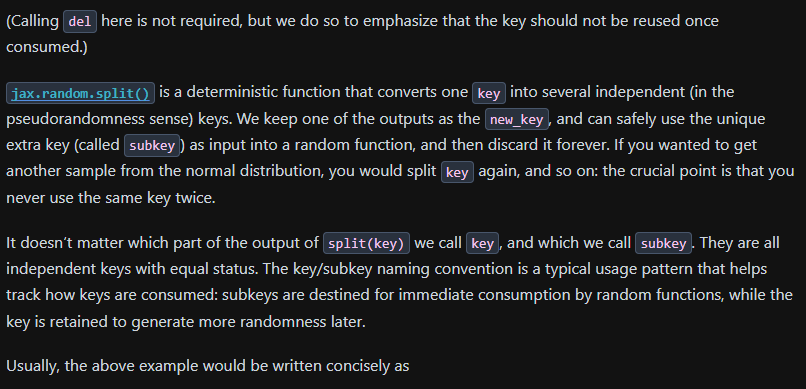

In [12]:
key, subkey = random.split(key)

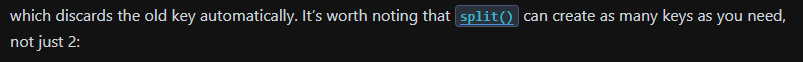

In [13]:
key, *forty_two_subkeys = random.split(key, num=43)

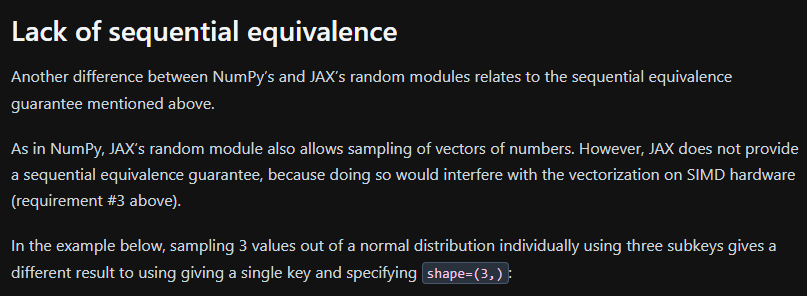

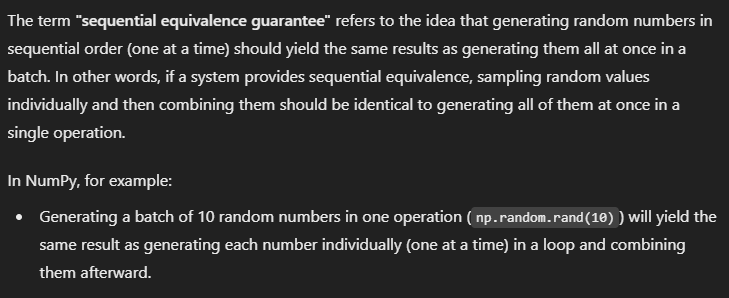

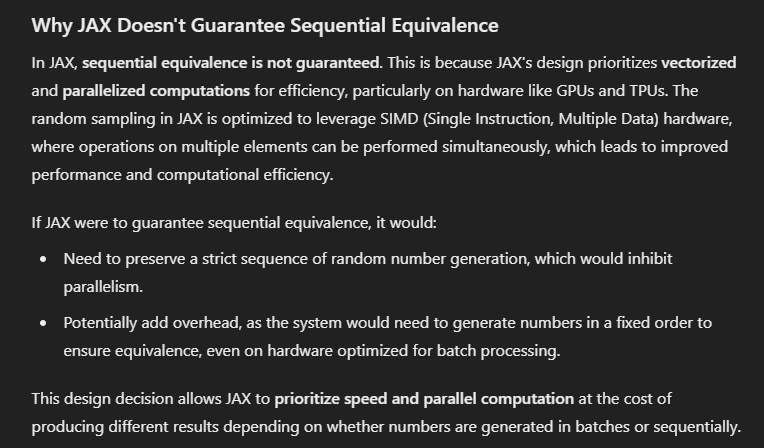

In [14]:
key = random.key(42)
subkeys = random.split(key, 3)
sequence = np.stack([random.normal(subkey) for subkey in subkeys])
print("individually:", sequence)

key = random.key(42)
print("all at once: ", random.normal(key, shape=(3,)))

individually: [-0.04838832  0.10796154 -1.2226542 ]
all at once:  [ 0.18693547 -1.2806505  -1.5593132 ]


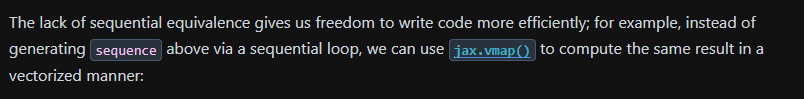

In [15]:
import jax
print("vectorized:", jax.vmap(random.normal)(subkeys))

vectorized: [-0.04838832  0.10796154 -1.2226542 ]
